In [46]:
import numpy as np  # import numpy, the fundamental package for scientific computing with Python.

import pandas as pd # import pandas, data structures and data analysis tools for the Python programming language.

import glob # import glob, glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell

import matplotlib.pyplot as plt # import matplotlib, a Python 2D plotting library
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [47]:
# This script reads T2 scan time from csv files that can be downloaded for each subject from HCP servers (e.g 199352_3T.csv)
# It also reads information from hcp_behavioural.csv to find gender information
# These files must be downloaded and placed in the correct folder before you can run the script
# Once you have these files you can use this script to male datastructures that contains the information you need

In [48]:
pwd # see what folder you are in, if not in folder subj cd to folder subj in next line

'/Users/rune/anaconda3/subj'

In [4]:
cd subj

/Users/rune/anaconda3/subj


In [49]:
for filename in glob.glob('*.csv'): # use glob to find all csv files in current folder, filenames will be stored in variable filename
    data = pd.read_csv(filename) # use pandas read to read all csv files detected by glob 
    # print(filename) # display all filenames as listed in variable filename

In [50]:
filename_all = [] # declare variables, not necesssary in Python, but makes sure they are empty in each run of the program in case of multiple runs of the program
t2time_all = []
subjID_all = [] 
t2hour_all = [] 



for filename in glob.glob('*.csv'): # use glob to find all HCP csv files in folder, and the for all csv files do: 
    data = pd.read_csv(filename) # use pandas read to import information from each subjects csv file.

    t2time = data.loc[data['Scan Description'] == 'T2w_SPC1', 'Acquisition Time'].item() # get time of day for the subjects fist T2 scan
    subjID = filename[:6] # Remove "_3T" from the filename to get subject ID number only
    t2hour = t2time[:2] # Remove minutes and seconds from scan time information

    filename_all.append(str(filename)) # Store all filenames
    t2time_all.append(str(t2time))     # Store all t2 scan times 
    subjID_all.append(int(subjID))     # Store all subject IDs
    t2hour_all.append(int(t2hour))     # Store all t2 scan hour-of-day only information
    
dict = {'Subject': subjID_all, 'T2 scan time (hour)': t2hour_all}  # Create strcuture that contains subjID and t2 scan time (hour) information
df = pd.DataFrame(dict)
# df.to_csv('subjID_and_T2scantime.csv') # save datastructre as csv file


df_sorted_t2scan = df.sort_values(by=['T2 scan time (hour)']) # Sort datastructure by T2 scan time hour
df_sorted_t2scan.to_csv('./out/df_sorted_t2scan.csv')   # save datastructre as csv file

df_sorted_SubjID = df.sort_values(by=['Subject']) # Sort datastructure by Subject ID
# df_sorted_SubjID.to_csv('./out/df_sorted_SubjID.csv')   # save datastructre as csv file

In [51]:
   ## Options for displaying or saving information to file
    
    
    #print(filename) # print filename as they are extracted from CSV file
    #print(t2time)   # print t2 scan time as they are extracted from CSV file

    #f= open("./out/filename.txt","a+") # Make file called filename.txt to store filename information as the for loop extracts data from .csv files
    #f.write(filename)            # Append filename information to file
    #f.write('\n')                # Insert lineshift
    #f.close()                    # Close file

    #f= open("./out/t2time.txt","a+")   # Store t2 scan time in file
    #f.write(t2time)
    #f.write('\n') 
    #f.close() 
    
    #f= open("./out/subjID.txt","a+")   # Store subjID in file
    #f.write(subjID)
    #f.write('\n') 
    #f.close()
    
    #f= open("./out/t2hour.txt","a+")   # Store t2 scan hour in file
    #f.write(t2hour)
    #f.write('\n') 
    #f.close()
    
    
    # print("")             # Print blank line
    # print("filename")     # Print label filename
    # print(filename_all)   # Print all filenames
    # print("")             # 
    # print("t2time")       # Print label t2time
    # print(t2time_all)      # Print all t2 scan times

In [52]:
# df_sorted_t2scan #  show datastructure containing SubjID and hour of T2 scan sorterd by T2 scan hour

In [53]:
# df_sorted_SubjID # show datastructure containing SubjID and hour of T2 scan sorterd by subjID

(array([137., 188., 233.,  58.,  65., 194.,  78., 115.,  30.,  15.]),
 array([ 7. ,  8.4,  9.8, 11.2, 12.6, 14. , 15.4, 16.8, 18.2, 19.6, 21. ]),
 <a list of 10 Patch objects>)

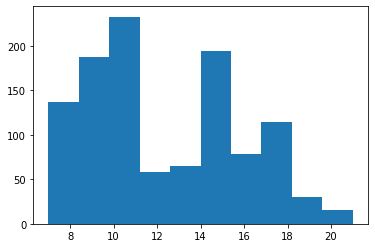

In [54]:
plt.hist(t2hour_all) # Plot the hour of T2 scan for all subjects

In [55]:
## Load HCP behavioral data and merge with datastructure df_sorted_SubjID

data_behav = pd.read_csv('./hcp_behavioral/hcp_behavioural.csv') # Load hcp_behavioural.csv containing gender ++ information into structure called data_beahv

In [56]:
data_behav.shape # check length and widht of data_behav. 1206 rows for 1206 subjects and 582 colums of data entries for each subject

(1206, 582)

In [57]:
data_behav = data_behav.loc[data_behav['Subject'].isin(df_sorted_SubjID.Subject.values)].copy() # Keep only subjects that are part of df_sorted_SubjID in data_behav 

In [58]:
data_behav.shape  # Check lenght and with of new dataframe, should be same length as df_sorted_SubjID but with width same as data_behav

(1113, 582)

In [59]:
df_sorted_SubjID = df_sorted_SubjID.sort_values(by=['Subject']) # Sort df_sorted_SubjID by subject ID
data_behav = data_behav.sort_values(by=['Subject'])  # Sort data_behav by subject ID

In [60]:
df_sorted_SubjID['Gender'] = data_behav.Gender.values # Create column 'Gender' and copy data_behav Gender values into new column in df_sorted_SubjID

In [61]:
# df_sorted_SubjID # display df_sorted_subjID

In [62]:
# data_behav # disply data_behav and check if gender information in df_sorted_SubjID is correct 

In [63]:
df_sorted_t2h_gender = df_sorted_SubjID.sort_values(by=['T2 scan time (hour)','Gender']) # make datastructure that sorts information by T2 scan time

In [64]:
df_sorted_t2h_gender.to_csv('./out/df_sorted_SubjID_with_gender.csv')   # save datastructre as csv file

In [65]:
df_sorted_t2h_gender # Show datastructure df_sorted_t2h_gender

,Subject,T2 scan time (hour),Gender
15,141422,7,F
437,151425,7,F
786,170934,7,F
151,237334,7,F
792,112920,7,M
567,191235,7,M
1058,803240,7,M
206,110007,8,F
659,121820,8,F
1005,123925,8,F
